In [33]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import NamedTuple
import scienceplots
plt.style.use(['science', 'ieee'])

In [16]:
class Action(NamedTuple):
    start: float  # time in seconds
    foot: int  # which foot (0-3), -1 for no contact
    dx: float  # x displacement in meters
    dy: float  # y displacement in meters
    duration: float  # duration in seconds

In [10]:
data = Path.cwd() / "data" / "contact_schedule.csv"

import pandas as pd
df = pd.read_csv(data, sep=',', header=None)

In [18]:
frequency = 25  # Hz

actions: list[Action] = []

for i, row in enumerate(df.values):
    foot, dx, dy, duration = row
    foot = int(foot)
    if foot == -1:
        continue
    t = i/frequency
    actions.append(Action(t, foot, dx, dy, duration))

print(actions)

[Action(start=0.0, foot=0, dx=0.0, dy=-0.0750000029802322, duration=0.2000941634178161), Action(start=0.08, foot=3, dx=0.0, dy=0.0750000029802322, duration=0.2193802744150161), Action(start=0.24, foot=0, dx=0.0, dy=-0.1500000059604644, duration=0.2059603631496429), Action(start=0.32, foot=3, dx=0.0, dy=0.1500000059604644, duration=0.227343738079071), Action(start=0.48, foot=0, dx=0.0, dy=-0.0750000029802322, duration=0.208410158753395), Action(start=0.68, foot=3, dx=0.0750000029802322, dy=0.1500000059604644, duration=0.2263005077838897), Action(start=0.72, foot=0, dx=-0.0750000029802322, dy=-0.1500000059604644, duration=0.205157995223999), Action(start=0.96, foot=0, dx=-0.0750000029802322, dy=-0.1500000059604644, duration=0.2157424837350845), Action(start=1.04, foot=3, dx=0.0, dy=0.0750000029802322, duration=0.2283702492713928), Action(start=1.2, foot=0, dx=-0.0750000029802322, dy=-0.1500000059604644, duration=0.2088145166635513), Action(start=1.32, foot=3, dx=0.0, dy=0.075000002980232

[(0.0, 0.2000941634178161), (0.24, 0.2059603631496429), (0.48, 0.208410158753395), (0.72, 0.205157995223999), (0.96, 0.2157424837350845), (1.2, 0.2088145166635513), (1.44, 0.2068951427936554), (3.36, 0.1993240863084793), (3.6, 0.2038222551345825), (4.68, 0.201440155506134), (4.92, 0.2069343626499176), (5.52, 0.2163213789463043), (5.84, 0.2069124728441238), (6.88, 0.203268676996231), (7.16, 0.2034147679805755), (7.64, 0.1908795088529586), (7.84, 0.1916707754135131), (8.24, 0.1813520640134811), (8.48, 0.1972698867321014), (8.68, 0.2029290348291397), (9.32, 0.1960932612419128), (9.56, 0.203507974743843)]
[(1.92, 0.188021719455719), (2.64, 0.1885585635900497), (3.16, 0.1957515776157379), (3.92, 0.1984160840511322), (5.32, 0.1987262368202209), (6.16, 0.1898157596588134), (6.4, 0.1786064803600311), (6.6, 0.1895148754119873), (7.4, 0.1944479942321777), (8.92, 0.2225792706012725)]
[(1.88, 0.2178969383239746), (2.36, 0.202235996723175), (3.08, 0.1914032399654388), (3.84, 0.1987268030643463), (4

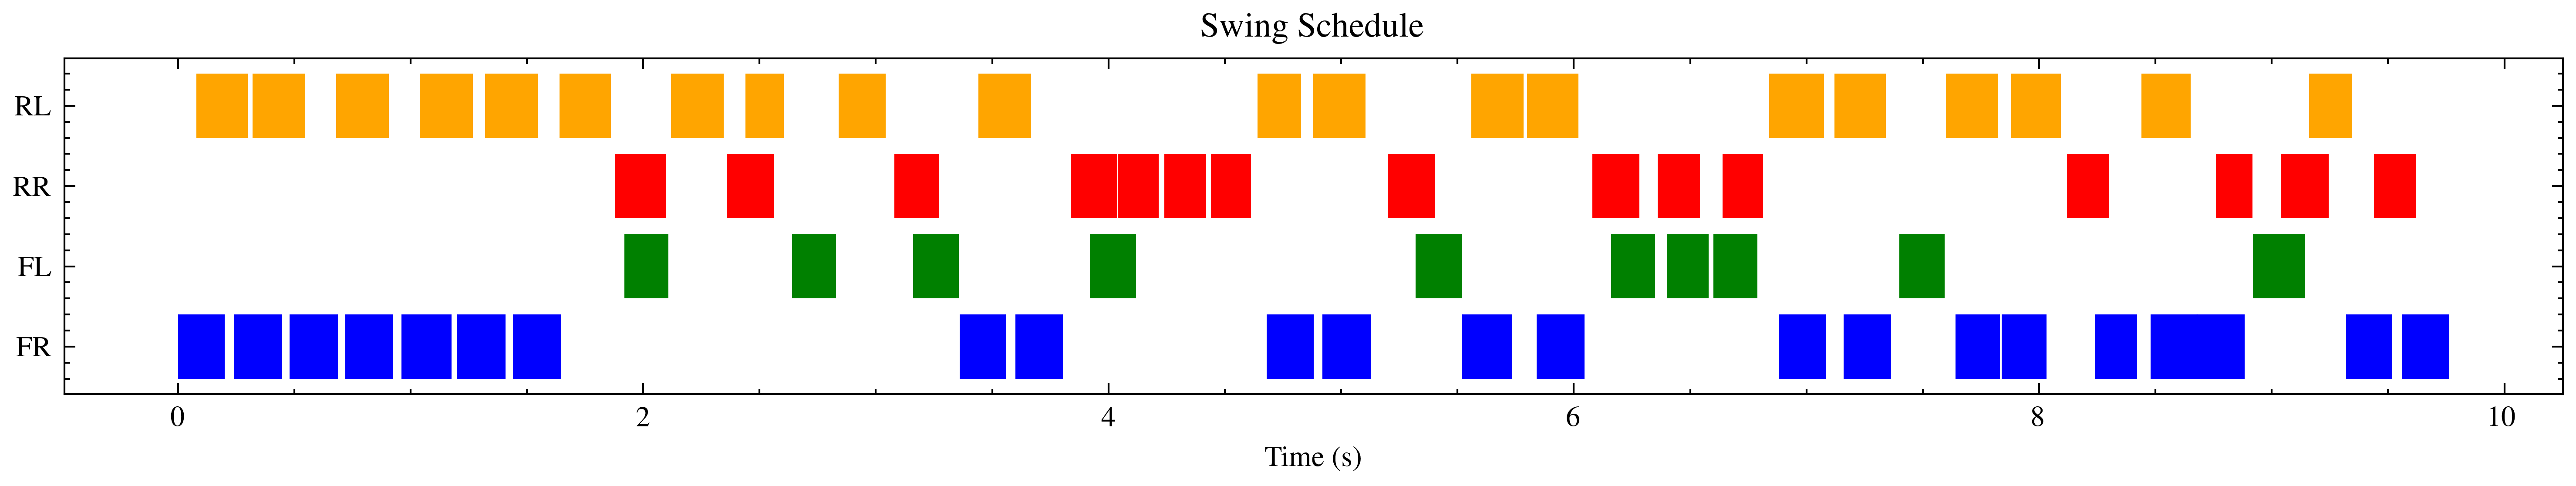

In [37]:
# plot actions on matplotlib event plot
# where each foot has it's own line
fig, ax = plt.subplots(figsize=(10, 2))
foot_lines = {0: [], 1: [], 2: [], 3: []}
foot_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'orange'}
for action in actions:
    foot_lines[action.foot].append((action.start, action.duration))

for foot, lines in foot_lines.items():
    print(lines)
    if lines:
        ax.broken_barh(lines, (foot - 0.4, 0.8), facecolors=foot_colors[foot])
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['FR', 'FL', 'RR', 'RL'])
ax.set_xlabel('Time (s)')
ax.set_title('Swing Schedule')
plt.tight_layout()
plt.show()